## XAMS SiPM simulation## 

In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define general geometry parameters ###

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
#wire thickness of anode wire
wire_thickness = 4 *10**-3
#wire spacing of anode wires
wire_spacing = 2.6-wire_thickness
# build geometry
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm, wire_thickness=wire_thickness, wire_spacing=wire_spacing)

### Define the geometry of the silicon PMs ###

In [3]:
# generate a XAMS geometry with SiPMs in plane above the LXe

# center SiPMs
sipm = SiPM(type="plane",position=[0,4,z_plane],qeff=0.25)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[0,-4,z_plane],qeff=0.25)
geo.add_sipm(sipm)

# ring SiPMs
n_circ = 6
r = 17.5
for phi in np.linspace(0,2*np.pi,n_circ,endpoint=False):
    sipm = SiPM(type="plane",position=[r*np.cos(phi),r*np.sin(phi),z_plane],qeff=0.25)
    geo.add_sipm(sipm)

### Simulate the SiPM acceptance ###

* uv_position is the position where the UV photons are generated
* n_mc is the number of MC photons

In [4]:
n_mc = 1000
sims = []
xbins = 2
ybins = 2
xmax = 20
ymax = 20

for x in np.linspace(0,xmax,xbins,endpoint=True):
    for y in np.linspace(0,ymax,ybins,endpoint=True):
        print("simulate @ x= ",x," mm", "simulate @ y= ",y, "mm")
        sim = Simulator(geo=geo,uv_position=[x,y,0],n_mc=n_mc)
        sim.generate_events()
        sims.append(sim)

simulate @ x=  0.0  mm simulate @ y=  0.0 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [0. 0. 0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00125  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00150  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00000  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00025  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00000  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00000  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00025  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00050  qe = 0.250
event generation done
simulate @ x=  0.0  mm simulate @ y=  20.0 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [ 0. 20.  0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00025  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00000  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00000  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.0

### Emulate events and reconstruct the position ###

* n_event = number of events to emulate
* n_uv = number of UV photons assumed for the S2 signal

In [5]:
recs = []
for sim in sims:
    rec = Reconstruction(sim=sim)
    rec.emulate_events(n_uv=50000,n_event=1000,method="CHI2",plot=False,nbins=1000,range=((-30,30),(-30,30)))
    recs.append(rec)

generated  0  events
generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
reconstruction done
                I       chi2       fval  status  xgen        xr  ygen  \
0    57681.169792  64.481252  38.463975     1.0   0.0  2.030990   0.0   
1    50341.404917  57.443683  34.677363     1.0   0.0  1.925715   0.0   
2    54254.452565  61.232994  37.519186     1.0   0.0  2.916655   0.0   
3    57397.968760  74.084657  47.981989     1.0   0.0  1.865750   0.0   
4    54267.804553  65.220980  40.762299     1.0   0.0  2.333157   0.0   
..            ...        ...        ...     ...   ...       ...   ...   
995  55191.563204  66.430177  41.054772     1.0   0.0  1.450922   0.0   
996  50054.426400  56.692860  34.073068     1.0   0.0  2.103447   0.0   
997  51042.559528  58.626199  35.477328     1.0   0.0  1.771130   0.0   
998  54972.306327  67.

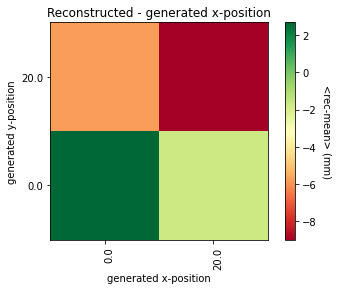

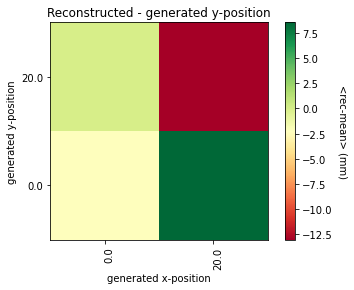

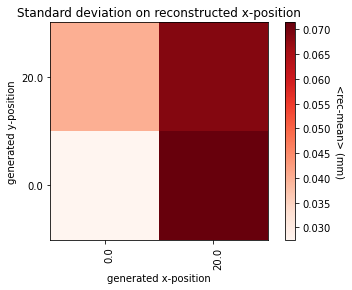

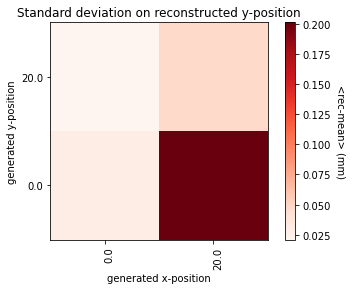

In [6]:
ana = Analysis(recs=recs, xsize=xbins, ysize=ybins, xmax= xmax, ymax=ymax)

ana.merge()
ana.plot(type = "xdif")
ana.plot(type = "ydif")
ana.plot(type = "xsig")
ana.plot(type = "ysig")

# Plots from here ...... #

<ipython-input-7-2669c120dce3>:32: RuntimeWarning: invalid value encountered in double_scalars
  dphi.append(np.arctan(df.yr.mean()/df.xr.mean())-np.arctan(reco.sim.get_x0()[1]/reco.sim.get_x0()[0]))
<ipython-input-7-2669c120dce3>:38: RuntimeWarning: divide by zero encountered in double_scalars
  srelx.append(df.xr.sem()/reco.sim.get_x0()[0])
<ipython-input-7-2669c120dce3>:39: RuntimeWarning: divide by zero encountered in double_scalars
  srely.append(df.yr.sem()/reco.sim.get_x0()[1])
<ipython-input-7-2669c120dce3>:32: RuntimeWarning: divide by zero encountered in double_scalars
  dphi.append(np.arctan(df.yr.mean()/df.xr.mean())-np.arctan(reco.sim.get_x0()[1]/reco.sim.get_x0()[0]))


[0.04028538896052581, 0.2134481360635404, 0.04522863262079859, 0.08337704834232125]
[0.0, 20.0, 20.0, 28.284271247461902]


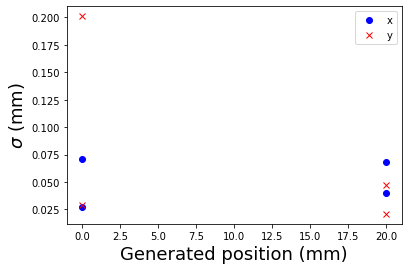

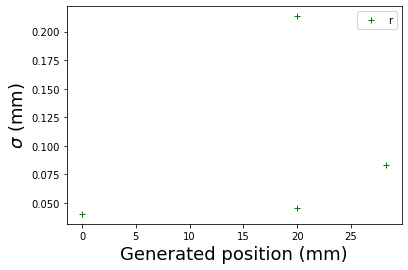

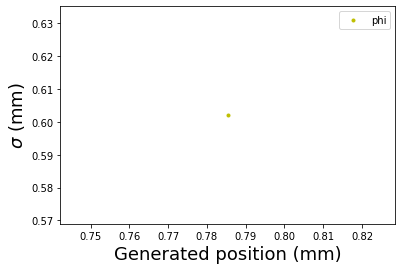

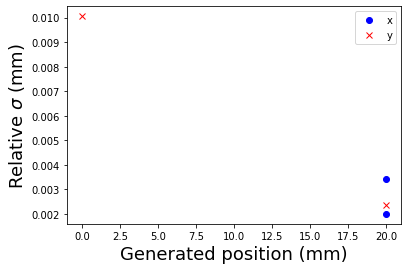

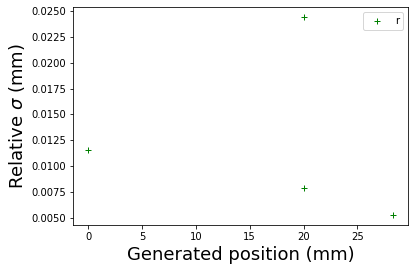

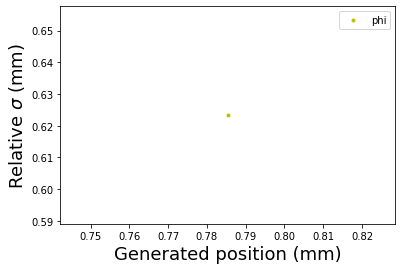

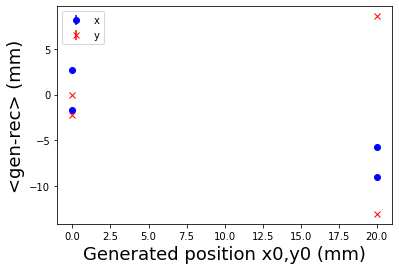

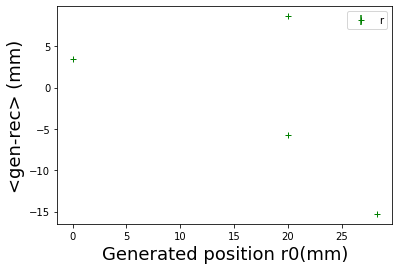

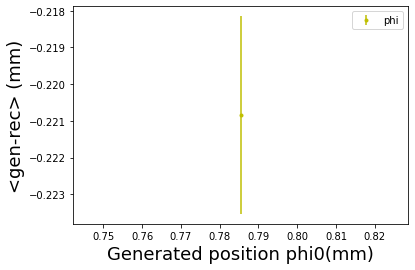

In [7]:
sx = []
sy = []
sr=[]
sphi=[]
srelx=[]
srely=[]
srelr=[]
srelphi =[]
x0 = []
y0 = []
r0 =[]
phi0 =[]
dx = []
dy = []
dr=[]
dphi=[]
dx_err = []
dy_err = []
dr_err = []
dphi_err = []


# loop through all the simulated locations
for reco in recs:
    df = reco.df_rec[reco.df_rec.status == 1]
    #print('xr =',df.xr.mean(),' yr =',df.yr.mean())
    dxtemp = df.xr.mean()-reco.sim.get_x0()[0]
    dytemp = df.yr.mean()-reco.sim.get_x0()[1]
    dx.append(dxtemp)
    dy.append(dytemp)
    dr.append((df.xr.mean()**2+df.yr.mean()**2)**0.5-(reco.sim.get_x0()[0]**2+reco.sim.get_x0()[1]**2)**0.5)
    dphi.append(np.arctan(df.yr.mean()/df.xr.mean())-np.arctan(reco.sim.get_x0()[1]/reco.sim.get_x0()[0]))

    sx.append(df.xr.sem())
    sy.append(df.yr.sem())
    sr.append(((df.xr.sem())**2+(df.yr.sem())**2)**0.5)
    sphi.append(np.arctan(df.yr.sem()/df.xr.sem()))
    srelx.append(df.xr.sem()/reco.sim.get_x0()[0])
    srely.append(df.yr.sem()/reco.sim.get_x0()[1])
    srelr.append(((df.xr.sem())**2+(df.yr.sem())**2)**0.5/(dxtemp**2+dytemp**2)**0.5)
    srelphi.append(np.arctan(df.yr.sem()/df.xr.sem())/np.arctan(dytemp/dxtemp))
    x0temp = reco.sim.get_x0()[0]
    y0temp = reco.sim.get_x0()[1]
    x0.append(x0temp)
    y0.append(y0temp)
    r0.append(((reco.sim.get_x0()[0])**2+(reco.sim.get_x0()[1])**2)**0.5)
    if x0temp != 0 and y0temp != 0:
        phi0.append(np.arctan(y0temp/x0temp))
    else:
        phi0.append(np.nan)
        
print(sr)
print(r0)

# reconstruction resolution
dx_err = np.array(sx)/np.sqrt(50000)
dy_err = np.array(sy)/np.sqrt(50000)
dr_err = np.array(sr)/np.sqrt(50000)
dphi_err = np.array(sphi)/np.sqrt(50000)


plt.plot(x0,sx,'bo')
plt.plot(x0,sy,'rx')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('$\sigma$ (mm)',fontsize=18)
plt.legend(['x','y'])
plt.show()

plt.plot(r0,sr, 'g+')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('$\sigma$ (mm)',fontsize=18)
plt.legend(['r'])
plt.show()

plt.plot(phi0,sphi, 'y.')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('$\sigma$ (mm)',fontsize=18)
plt.legend(['phi'])
plt.show()

#relative error
plt.plot(x0,srelx,'bo')
plt.plot(x0,srely,'rx')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('Relative $\sigma$ (mm)',fontsize=18)
plt.legend(['x','y'])
plt.show()

plt.plot(r0,srelr, 'g+')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('Relative $\sigma$ (mm)',fontsize=18)
plt.legend(['r'])
plt.show()

plt.plot(phi0,srelphi, 'y.')
plt.xlabel('Generated position (mm)',fontsize=18)
plt.ylabel('Relative $\sigma$ (mm)',fontsize=18)
plt.legend(['phi'])
plt.show()

# reconstruction bias
plt.errorbar(x0,dx,fmt='bo',yerr=dx_err)
plt.errorbar(y0,dy,fmt='rx',yerr=dy_err)
plt.xlabel('Generated position x0,y0 (mm)',fontsize=18)
plt.ylabel('<gen-rec> (mm)',fontsize=18)
plt.legend(['x','y'])
plt.show()

plt.errorbar(r0,dr,fmt='g+',yerr=dr_err)
plt.xlabel('Generated position r0(mm)',fontsize=18)
plt.ylabel('<gen-rec> (mm)',fontsize=18)
plt.legend(['r'])
plt.show()

plt.errorbar(phi0,dphi,fmt='y.',yerr=dphi_err)
plt.xlabel('Generated position phi0(mm)',fontsize=18)
plt.ylabel('<gen-rec> (mm)',fontsize=18)
plt.legend(['phi'])
plt.show()

[0. 0. 0.]
<xr> =  2.7085108908929887  +/- 0.027527832176326823  mm
    rms_x =  0.8705064872406261  mm
<yr> =  -2.1862262994766133  +/- 0.029413109651528525  mm
    rms_y =  0.9301241956711159  mm


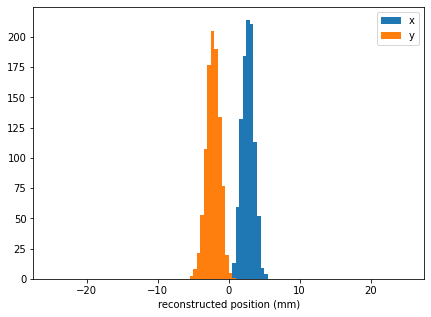

In [8]:
i=0

rec = recs[i]
print(rec.sim.get_x0())
recs[i].plot(type="res",bins=100,range=(-25,25))

In [9]:
i=10
rec = recs[i]
print(rec.sim.get_x0())
ax = recs[i].plot(type="xy",range=((-25,25),(-25,25)))

IndexError: list index out of range

In [ ]:
recs[i].plot(type="intensity",range=(0,90000))

In [ ]:
recs[i].plot(type="fit_quality",bins=60)

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
import scipy.stats as stats
# Plot the theoretical density of f
x = np.arange(0, 50, .05)
plt.plot(x, 350*stats.chi2.pdf(x, df=5), color='r', lw=2)
#h=plt.hist(df['chi2'],bins=50)
rec.plot(type="fit_quality",bins=60)
plt.xlim([0,30])